# Discussion 5 Supplemental Notebook

In [9]:
import re

In [10]:
class NotStringError(Exception):
    pass

def find_matches(text_list, regex):
    if not isinstance(text_list, list):
        text_list = [text_list]
    
    for i, text in enumerate(text_list):
        if not isinstance(text, str):
             raise NotStringError(f'The {i}th item is not a string.')
    
    matches = [re.search(regex, text) for text in text_list]
        
    return [None if match is None else match[0] for match in matches]
    

# Regular Expressions

## Question 1

### Kernel Density Estimation
We wish to compare the results of kernel density estimation using a gaussian kernel and aboxcar kernel. For $α >0$, which of the following statements are true? Choose all that apply.  

Gaussian Kernel:

$$K_{\alpha}(x,z) = \frac{1}{\sqrt{2 \pi \alpha{^2}}}e^{-\frac{(x-z)^2}{2\alpha^2}}$$

Boxcar Kernel:

\begin{align*}
    B_{\alpha}(x,z) = \begin{cases}
                            \frac{1}{\alpha}\ if\ -\frac{\alpha}{2} < x-z < \frac{\alpha}{2} \\
                            0\ else
                      \end{cases}
\end{align*}
                     

How to write in Latex a multiple line left brace: [https://tex.stackexchange.com/questions/122778/left-brace-including-several-lines-in-eqnarray](https://tex.stackexchange.com/questions/122778/left-brace-including-several-lines-in-eqnarray)

A.  Decreasing $α$ for a gaussian kernel decreases the smoothness of the KDE.  
B.  The gaussian kernel is always better than the boxcar kernel for KDEs.  
C.  Because the gaussian kernel is smooth, we can safely use large $α$ values for kernel density estimation without worrying about the actual distribution of data.
D.  The area under the box car kernel is 1, regardless of the value of $α$.  
E.  None of the above. 

##### Answer:

A and D are true.  

A: $\alpha$ is the standard deviation, so the smaller it is the narrower the gaussian, and the less smooth the KDE.  
B: The gaussian kernel requires more computation, so if there are many points it might be too slow.  
C: The value of $\alpha$ should be chosen for each distribution, if the points were close and it was too smooth then the distribution wouldn't be visible.  
D: Its width is always $\alpha$ and its height is always $\frac{1}{\alpha}$, so its area is always one.  


## Question 2

In [3]:
texts = ['What is 1+1?', 'Make a wish at 11:11', '111 Ways to Succeed']
regex = r'1+1$'
find_matches(texts, regex)

[None, '11', None]

## Question 3

In [5]:
records = [
    '<record> Samuel Lau <samlau95@gmail.com> Faculty </record>',
    '<record> Manana Hakobyan <manana.hakobyan@berkeley.edu> TA </record>'
]
regex1 = r'<.*@.*>'
regex2 = r'<[^<]*@[^>]*>'
regex3 = r'<.*@\w+\..*>'

In [6]:
find_matches(records, regex1)

['<record> Samuel Lau <samlau95@gmail.com> Faculty </record>',
 '<record> Manana Hakobyan <manana.hakobyan@berkeley.edu> TA </record>']

In [7]:
find_matches(records, regex2)

['<samlau95@gmail.com>', '<manana.hakobyan@berkeley.edu>']

In [8]:
find_matches(records, regex3)

['<record> Samuel Lau <samlau95@gmail.com> Faculty </record>',
 '<record> Manana Hakobyan <manana.hakobyan@berkeley.edu> TA </record>']

## Question 4
For each pattern specify the starting and ending position of the first match in the string.  The index starts at zero and we are using closed intervals (both endpoints are included).

| regex     | str2    |  str3 | str4   |   str5   |
|-----------|:-------:|:-----:|:------:|---------:|
| -         | abcdefg | abcs! | ab abc | abc, 123 |
| abc*      | [0,2]   | [0,2] | [0,1]  | [0,2]    |
| [ˆ\s]+    | [0,6]   | [0,4] | [0,1]  | [0,3]    |
| ab.*c     | [0,2]   | [0,2] | [0,5]  | [0,2]    |
| [a-z1,9]+ | [0,6]   | [0,3] | [0,1]  | [0,3]    |

In [43]:
strs = ['abcdefg', 'abcs!', 'ab abc', 'abc, 123']
res = [r'abc*', r'[^\s]+', r'ab.*c', r'[a-z1,9]+']
[(lambda p,s,t: (x,y,t[0],t[1]-1))(x,y,re.search(x, y).span()) for x in res for y in strs]

[('abc*', 'abcdefg', 0, 2),
 ('abc*', 'abcs!', 0, 2),
 ('abc*', 'ab abc', 0, 1),
 ('abc*', 'abc, 123', 0, 2),
 ('[^\\s]+', 'abcdefg', 0, 6),
 ('[^\\s]+', 'abcs!', 0, 4),
 ('[^\\s]+', 'ab abc', 0, 1),
 ('[^\\s]+', 'abc, 123', 0, 3),
 ('ab.*c', 'abcdefg', 0, 2),
 ('ab.*c', 'abcs!', 0, 2),
 ('ab.*c', 'ab abc', 0, 5),
 ('ab.*c', 'abc, 123', 0, 2),
 ('[a-z1,9]+', 'abcdefg', 0, 6),
 ('[a-z1,9]+', 'abcs!', 0, 3),
 ('[a-z1,9]+', 'ab abc', 0, 1),
 ('[a-z1,9]+', 'abc, 123', 0, 3)]

## Question 5

Write a regular expression that matches strings (including the empty string) that only contain lowercase letters and numbers.  
##### Answer:

In [61]:
re.search('^[a-z0-9]*$', "b1a")

<re.Match object; span=(0, 3), match='b1a'>

In [57]:
regex5 = '^[a-z0-9]*$'
# only matches strings containing lowercase letters and numbers.
re.search(regex5, 'fre34eio25u').groups()

()

In [58]:
# lowercase letters and numbers only
string = 'fre34eio25u'
find_matches(string, regex5)

['fre34eio25u']

In [59]:
# Some uppercase letters and numbers
string = 'freFB34eio25u'
find_matches(string, regex5)

[None]

In [60]:
# lowercase letters only
string = 'frank'
find_matches(string, regex5)

['frank']

In [62]:
# A mixture of letters, numbers and symbols
string = 'bab126ebi%^bobu88b'
find_matches(string, regex5)

[None]

## Question 6
##### Answer:

In [73]:
re.search(r'^([^aeiouAEIOU]*[aeiouAEIOU]){5}[^aeiouAEIOU]*$', "fffffadEdDd iou ")

<re.Match object; span=(0, 16), match='fffffadEdDd iou '>

In [75]:
regex6 = '^([^aeiouAEIOU]*[aeiouAEIOU]){5}[^aeiouAEIOU]*$'
# If a group matches multiple times, only the last match is accessible
re.search(regex6, 'baeiou').groups()

('u',)

In [76]:
# 5 consecutive vowels
string = 'baeiou'
find_matches(string, regex6)

['baeiou']

In [77]:
# 5 non-consecutive vowels
string = 'babebibobub'
find_matches(string, regex6)

['babebibobub']

In [78]:
# 4 vowels no match
string = 'babebibobbb'
find_matches(string, regex6)

[None]

In [79]:
# 6 vowels no match
string = 'aaaaaabbbbbb'
find_matches(string, regex6)

[None]

## Question 7
##### Answer:

In [80]:
re.sub('[aeiouAEIOU]', 'o','123 Orange Street')

'123 orongo Stroot'

In [ ]:
address = "123 Orange Street"
regex7 = r"[aeiouAEIOU]"
re.sub(regex7, "o", address)

## Question 8

In [83]:
re.findall(r'[0-9]+', 'October 10, November 11, December 12, January 1')

['10', '11', '12', '1']

In [82]:
dates = 'October 10, November 11, December 12, January 1'
regex8 = '[0-9]+'
re.findall(regex8, dates)

['10', '11', '12', '1']

## Question 9
Given the following text in a variable `log`:  
  
`169.237.46.168 - - [26/Jan/2014:10:47:58 -0800]  
"GET/stat141/Winter04/HTTP/1.1" 200 2585"  
http://anson.ucdavis.edu/courses/"` 
  
Fill in the regular expression in the variable `pattern` below so that after it executes, day is 26, month is Jan, and year is 2014.  
  
`pattern = ...  
matches = re.findall(pattern, log)  
day, month, year = matches[0]`
  
##### Answer:

In [107]:
log = '169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] '\
      '"GET/stat141/Winter04/HTTP/1.1" 200 2585 '\
      '"http://anson.ucdavis.edu/courses/"'
pattern = r'\[(\d{1,2})/(\w{3})/(\d{4})'
matches = re.findall(pattern, log)
day, month, year = matches[0]
print(day, month, year)

26 Jan 2014


# SQL
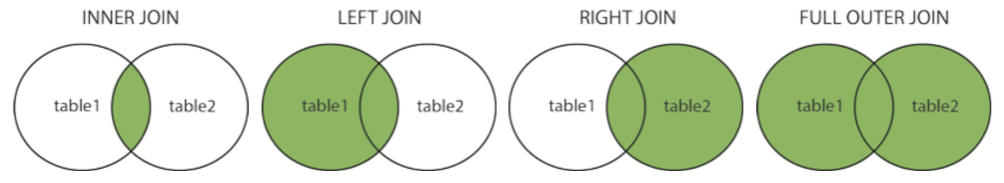
Note: You do not always have to use the `JOIN` keyword to join sql tables.  The following are equivalent:  

`SELECT column1, column2`  
`FROM table1, table2`  
`WHERE table1.id = table2.id;`  
  
`SELECT column1, column2`  
`FROM table1 JOIN table2 ON table1.id = table2.id;` 

## Question 10
Describe which records are returned from each type of join.

##### Answer:

- Inner Join: records from both tables that have the same id
- Left Join: like the Inner Join, and all the remaining records from table1
- Right Join: ..., ... table2
- Full Outer Join: like Inner Join, and all the remaing records from both tables

## Question 11
Consider the following real estate schema: 
  
`Homes(home_id int, city text, bedrooms int, bathrooms int, area int)`  
`Transactions(home_id int, buyer_id int, seller_id int,transaction_date date, sale_price int)`  
`Buyers(buyer_id int, name text)`  
`Sellers(seller_id int, name text)` 
  
Fill in the blanks in the SQL query to find the id and selling price for each home in Berkeley.  
If the home has not ben sold yet, **the price should be NULL**.  
  
##### Answer:  
  
`SELECT home_id, sale_price`  
`FROM Homes`  
`LEFT JOIN Transactions`  
`ON Homes.home_id = Transactions.home_id`  

